# Self-Organizing Maps

Here we will look into the structure of solf-organising maps, and how this method can be a useful example of unsupervised machine learning. This is mainly going to be a result of my independant research, so I will try to explain myself well as we progress through this notebook. There is also not a default python package for it, so any implementation is best coded by yourself.

In essence, SOMs try to reduce the dimensionality of a given $\mathcal{N}$-dimensional dataset. The way it maps the elements of the input array to the nodes in the output array is by having the nodes *compete* for a given element(s).

## The data

### Image

To start with, we will examine how a 2-dimensional image is mapped. Now of course the image can be represented in three dimensions by considering the RGB colour for each pixel. We will gradually build up our SOM technique by changing the image colour.

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

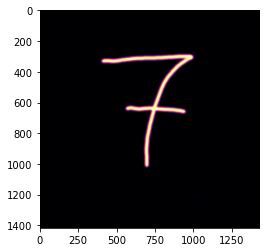

In [62]:
image = Image.open('test-image.png')
image.convert('1')
image_arr = 255-np.asarray(image)
plt.imshow(image_arr[:, :, 2], cmap='magma')
# plt.scatter(j_mesh[:, ::-1], i_mesh[:, ::-1], c=image_arr.reshape((-1, 3), order="F")[:, 2], cmap='magma')

In [9]:
image_arr.reshape(-1, 3).shape

(2024893, 3)

In [56]:
np.unique(image_arr)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

### sklearn iris

Another dataset that might be useful is the iris dataset from scikit-learn. From the website:

> The Iris dataset represents 3 kind of Iris flowers (Setosa, Versicolour and Virginica) with 4 attributes: sepal length, sepal width, petal length and petal width.

In [4]:
from sklearn import datasets

iris = datasets.load_iris()
print(iris.data.shape)
iris_som = iris.data[:, :2]
iris_label = iris.target

(150, 4)


In [5]:
iris_som.shape

(150, 2)

## Fitting the data

For applying SOM, we will first use the third-party package [sklearn_som](https://pypi.org/project/sklearn-som/), which is designed to interface well with scikit-learn. There are a couple things to note about the SOM process in this implementation:

 - shape of the data: $(n_{data}, n_{features})$
 - shape of classifications: $(m, n)$

In this case, if one has $\mathcal{N}$-dimensional data to fit, it must be reduced to a $2$-D array with the length of the first dimension as the number of elements and the length of the second dimension the $\mathcal{N}$ features to fit. Therefore, some pre-processing must be performed before training something like an image array in the SOM instance.

As for how the data is classified, the arguments `m, n` refer to the two dimensions of the output, namely vertical and horizontal. If you only need $1$-D classifications of neurons, one may set either $m$ or $n$ to the number of classifications while setting the other to $1$.

### Image

In [4]:
from sklearn_som.som import SOM

In [64]:
# Fix the image data
if image_arr.ndim > 2:
    
    # Define map coordinates
    i_arr = np.arange(image_arr.shape[0])
    j_arr = np.arange(image_arr.shape[1])
    i_mesh, j_mesh = np.meshgrid(i_arr, j_arr)
    print(i_mesh.shape)

    # Resize image array
    image_arr = image_arr.reshape((-1, 3), order="F")

# Temporarily make the image binary
# image_arr[image_arr > 0] = 1

# Create data array with the proper dimensions
image_som = np.concatenate([i_mesh.reshape((-1, 1)), j_mesh.reshape((-1, 1)), image_arr], axis=1)

(1429, 1417)


In [58]:
som = SOM(m=4, n=2, dim=3)
image_predict = som.fit_predict(image_arr)

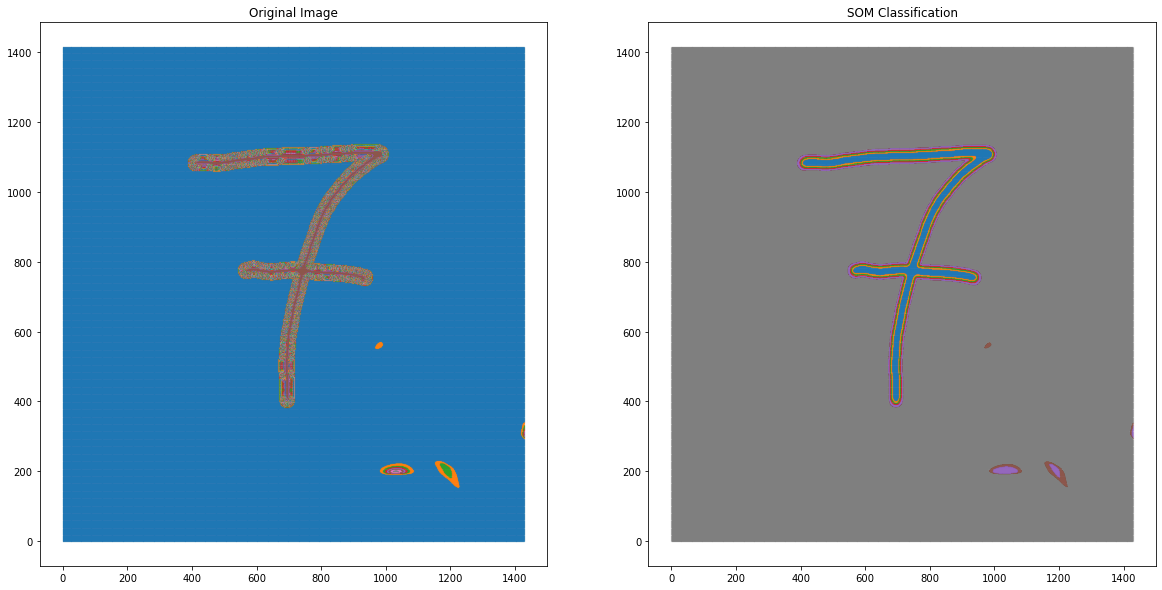

In [68]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

n_features = np.max((image_arr.max(), image_predict.max())) + 1
# n_features = np.maximum((np.unique(image_arr[image_arr>0]).size, np.unique(image_predict[image_predict>0]).size))

for _ in range(n_features):
    # print(_)
    i = (image_arr == _).all(1)
    axes[0].scatter(image_som[:, 1][i], image_som[::-1, 0][i], s=0.01)
    i = image_predict == _
    axes[1].scatter(image_som[:, 1][i], image_som[::-1, 0][i], s=0.01)
    
axes[0].set_title("Original Image")
axes[1].set_title("SOM Classification") ;

### Iris dataset

Using the IRS dataset (as in the example for `sklearn_som`)

In [11]:
som = SOM(m=3, n=1, dim=4)
som_alt = SOM(m=1, n=3, dim=2)

som_predict = som.fit_predict(iris.data)

som_alt.fit(iris_som)
som_predict_alt = som_alt.predict(iris_som)

n_features = np.max((np.unique(iris_label).size, np.unique(som_predict).size, np.unique(som_predict_alt).size))

Text(0.5, 1.0, 'SOM prediction alt')

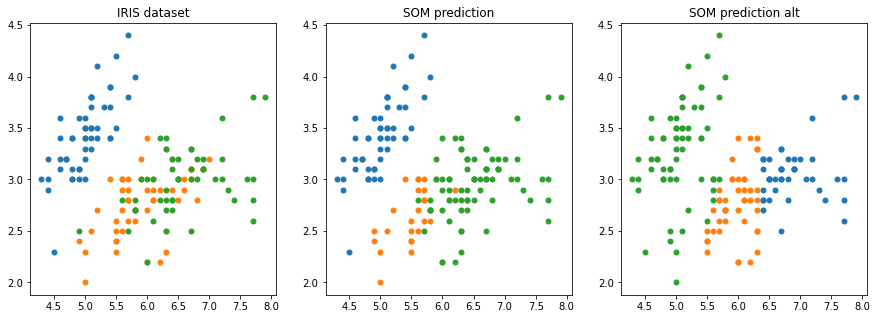

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for _ in range(n_features):
    i = iris_label == _
    axes[0].scatter(iris_som[i, 0], iris_som[i, 1], s=25)
    i = som_predict == _
    axes[1].scatter(iris_som[i, 0], iris_som[i, 1], s=25)
    i = som_predict_alt == _
    axes[2].scatter(iris_som[i, 0], iris_som[i, 1], s=25)

axes[0].set_title("IRIS dataset")
axes[1].set_title("SOM prediction")
axes[2].set_title("SOM prediction alt")

In [13]:
from sklearn import datasets
datasets.load_iris().data[:, :2].shape

(150, 2)